In [2]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 964.5 kB/s eta 0:00:0000:0100:05
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 4.5 MB/s eta 0:00:00a 0:00:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 4.1 MB/s eta 0:00:00a 0:00:01
    

In [3]:
import tensorflow as tf
import numpy as np

### Exercise 1: f(a, b) = 3a - 2b

In [4]:
a_vec = np.random.randint(10, size=1000)
b_vec = np.random.randint(10, size=1000)

In [5]:
a_vec[:10]

array([2, 8, 8, 9, 9, 8, 1, 5, 5, 9])

In [6]:
b_vec[:10]

array([8, 9, 2, 2, 3, 2, 2, 2, 2, 1])

In [7]:
f_vec = a_vec * 3 - b_vec * 2

In [8]:
f_vec[:10]

array([-10,   6,  20,  23,  21,  20,  -1,  11,  11,  25])

### keras model


In [9]:
import tensorflow.keras as keras

just input & output (no hidden layer)

A  B
|  |
  o(output)

In [10]:
# 1: one layer
# 2: two inputs
model = keras.Sequential(
  [keras.layers.Dense(1, input_dim=2)]
)

/Users/jiaronghe/.pyenv/versions/3.11.3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss="mean_squared_error")

In [12]:
inputs = np.stack([a_vec, b_vec], axis=1)

In [13]:
inputs[:3]

array([[2, 8],
       [8, 9],
       [8, 2]])

In [14]:
model.fit(inputs, f_vec, epochs=300)

# check the loss getting less

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 326.0952
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 299.7724
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 303.0625
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 288.5219
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 287.9556
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 267.0761
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 250.7407
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 249.4882
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 234.1238
Epoch 10/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 263.6111
Epoch 11/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 237.1772
Epoch 12/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 232.0537
Epoch 13/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 220.6007
Epoch 14/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 221.2225
Epoch 15/300
32

In [15]:
preds = model(inputs)

In [16]:
preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-9.995513 ],
       [ 6.0094957],
       [20.007174 ],
       [23.007954 ],
       [21.008286 ],
       [20.007174 ],
       [-0.9982817],
       [11.004836 ],
       [11.004836 ],
       [25.007622 ]], dtype=float32)>

In [17]:
def show_diff(preds, ys, m):
    preds = preds.numpy()
    preds = [int(np.round(x)) for x in preds[:m]]
    print(preds)
    print(list(ys[:m]))

In [18]:
show_diff(preds, f_vec, 10)

[-10, 6, 20, 23, 21, 20, -1, 11, 11, 25]
[-10, 6, 20, 23, 21, 20, -1, 11, 11, 25]


/var/folders/qn/q_wdcf6x4kx5w2f12hyjr3700000gn/T/ipykernel_74783/2041628688.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  preds = [int(np.round(x)) for x in preds[:m]]


In [21]:
model.trainable_variables

[<KerasVariable shape=(2, 1), dtype=float32, path=sequential/dense/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential/dense/bias>]

### Exercise 2: f(x) = x^2 + 1

In [22]:
xs = np.random.randint(10, size=1000)

In [23]:
xs[:10]

array([8, 4, 2, 0, 8, 3, 1, 8, 4, 5])

In [24]:
ys = np.array([x**2 + 1 for x in xs])
ys[:10]

array([65, 17,  5,  1, 65, 10,  2, 65, 17, 26])

In [25]:
new_inputs = np.stack([xs, xs], axis=1)
new_inputs[:10]

array([[8, 8],
       [4, 4],
       [2, 2],
       [0, 0],
       [8, 8],
       [3, 3],
       [1, 1],
       [8, 8],
       [4, 4],
       [5, 5]])

In [26]:
model1 = keras.Sequential(
    [
      keras.layers.Dense(4, activation="tanh", input_dim=2),
      keras.layers.Dense(1)
    ]
)

/Users/jiaronghe/.pyenv/versions/3.11.3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# define loss function

model1.compile(
  loss="mean_squared_error"
)

In [29]:
# if it's less than 0.1, acceptable

model1.fit(new_inputs, ys, epochs=500)

Epoch 1/500


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 11.2911
Epoch 2/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 11.5033
Epoch 3/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 11.3409
Epoch 4/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 10.9232
Epoch 5/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 9.7350
Epoch 6/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 10.3831
Epoch 7/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 9.7601
Epoch 8/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 8.1515
Epoch 9/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 8.7161
Epoch 10/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 9.6551
Epoch 11/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 9.7922
Epoch 12/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 9.2864
Epoch 13/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 9.0422
Epoch 14/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 8.1554
Epoch 15/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/s

In [30]:
new_preds = model1(new_inputs)

In [31]:
show_diff(new_preds, ys, 15)

[66, 17, 6, 0, 66, 10, 3, 66, 17, 27, 0, 27, 82, 3, 66]
[65, 17, 5, 1, 65, 10, 2, 65, 17, 26, 1, 26, 82, 2, 65]


/var/folders/qn/q_wdcf6x4kx5w2f12hyjr3700000gn/T/ipykernel_74783/2041628688.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  preds = [int(np.round(x)) for x in preds[:m]]


### mnist

In [32]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [33]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [34]:
len(x_train)

60000

In [35]:
len(x_test)

10000

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

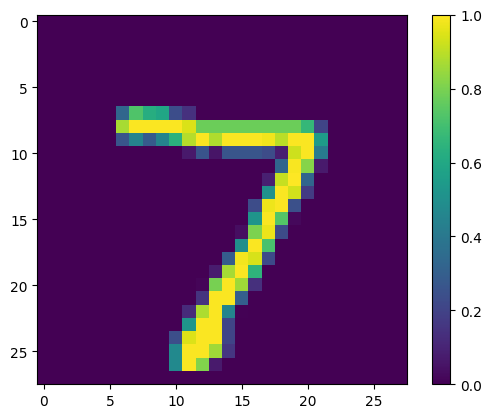

In [37]:
plt.imshow(x_test[0, :, :])
plt.colorbar()

### model

In [38]:
model = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)), # input layer: 28x28 flatten to one dimension
        keras.layers.Dense(128, activation="relu"), # hidden layer: 128 nodes
        keras.layers.Dense(10), # output layer: 0,1,2,3,..,9 (10 possible results)
    ]
)

/Users/jiaronghe/.pyenv/versions/3.11.3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(
  loss=loss_fn,
  optimizer="adam",
  metrics=["accuracy"]
)

In [40]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - accuracy: 0.8753 - loss: 0.4315
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 797us/step - accuracy: 0.9633 - loss: 0.1224
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step - accuracy: 0.9762 - loss: 0.0790
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.9829 - loss: 0.0579
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.9867 - loss: 0.0427
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.9905 - loss: 0.0333
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.9925 - loss: 0.0268
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.9942 - loss: 0.0219
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.9951 - loss: 0.0168
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 799us/step - accuracy: 0.9952 - loss: 0.0147


In [41]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.9669 - loss: 0.1181


[0.09547237306833267, 0.9736999869346619]

In [42]:
pred = model(x_test[5:6])

In [43]:
pred

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-14.589688 ,   6.793307 ,  -6.734755 ,  -7.9051976,  -8.56834  ,
        -11.867233 , -11.66984  ,  -0.5322224,  -0.9979662,  -8.561523 ]],
      dtype=float32)>

In [44]:
# 取最大值

np.argmax(pred[0])

1